In [104]:
# predict whether customer will exit (Output variable “Exited”) the bank or not

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# from C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Week7\Multiple Layer Neural Network\
#     Problem2\Machine_Learning_Python\Utility.DataPreprocessing import DataPreprocessing as data_prep
# import sys
# sys.path.insert(0, 'Machine_Learning_Python/Utility/')

# import DataPreprocessing.feature_scaling

In [106]:
out_start =  datetime.now()

In [107]:
dataframe = pd.read_csv('Data/Churn_Modelling.csv')

In [108]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
dataframe = dataframe.drop(['RowNumber','CustomerId','Surname','Gender'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4231024320>,
      dtype=object)

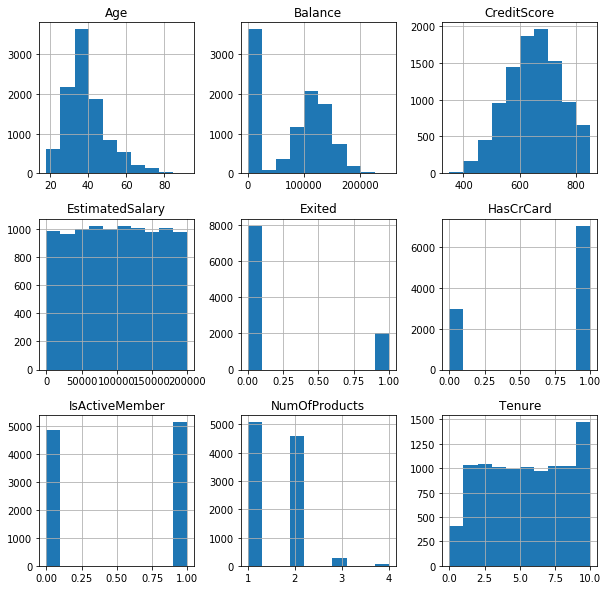

In [110]:
dataframe.hist(figsize=(10,10))

In [111]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 781.3+ KB


In [112]:
class DataPreprocessing:

    def __init__(self):
        print()

    @staticmethod
    def complete_Replace(dataframe, original, new):
        return dataframe[original].replace(original, new, inplace=True)

    @staticmethod
    def one_hot_encoder(dataframe):
        return pd.get_dummies(dataframe)

    @staticmethod
    def fill_Na(dataframe, column, fill):
        dataframe[column] = dataframe[column].fillna(fill)
        return dataframe

    @staticmethod
    def feature_scaling(dataframe, column):
        dataframe[column] = np.divide(np.subtract(dataframe, dataframe[column].mean()),
                                      dataframe[column].std())
        return dataframe[column]

    @staticmethod
    def split(dataframe, numrows):
        test_data = dataframe.tail(numrows).reset_index(drop=True)
        # here we reset index as if the index remain same for accessing by index could be difficult
        return dataframe.head(len(dataframe)-numrows).reset_index(), test_data.reset_index()

    @staticmethod
    def sigmoid_Function(Z):
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz

    

In [113]:
dataframe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [114]:
dataframe = DataPreprocessing.one_hot_encoder(dataframe)

In [115]:
dataframe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [116]:
dataframe = dataframe.rename(columns={'Exited':'y'})

In [117]:
dataframe,test_data = DataPreprocessing.split(dataframe,1000)

In [118]:
Exited = dataframe['y']

In [119]:
for item in dataframe:
    dataframe[item] = DataPreprocessing.feature_scaling(dataframe,item)

In [120]:
dataframe['y'] = Exited

In [121]:
dataframe.head()

,index,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y,Geography_France,Geography_Germany,Geography_Spain
0,-1.731762,-6.733244,-3.889298,-2.333158,-1.223806,-5.606532,-5.323248,-4.492037,-1.742713,1,-4.462832,-4.576851,-4.575168
1,-1.731377,-6.733240,-3.889261,-2.333025,-1.223806,-5.605871,-5.322407,-4.491267,-1.742713,0,-4.462063,-4.575962,-4.574279
2,-1.730992,-6.733236,-3.889224,-2.332892,-1.223806,-5.605210,-5.321565,-4.490497,-1.742713,1,-4.461293,-4.575073,-4.573391
3,-1.730608,-6.733232,-3.889187,-2.332758,-1.223806,-5.604549,-5.320723,-4.489727,-1.742713,0,-4.460523,-4.574184,-4.572502
4,-1.730223,-6.733228,-3.889150,-2.332625,-1.223806,-5.603888,-5.319882,-4.488957,-1.742713,0,-4.459753,-4.573295,-4.571614


In [122]:
dataframe = dataframe.drop('index', axis = 1)

In [123]:
test_data.head()

,index,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y,Geography_France,Geography_Germany,Geography_Spain
0,0,616,37,9,0.00,1,1,0,111312.96,0,1,0,0
1,1,688,32,6,124179.30,1,1,1,138759.15,0,0,0,1
2,2,605,36,7,128829.25,1,1,0,190588.59,0,1,0,0
3,3,676,33,6,171490.78,1,0,0,79099.64,0,1,0,0
4,4,708,33,3,0.00,2,1,0,138613.21,0,0,0,1


In [124]:
test_data = test_data.drop('index', axis = 1)

In [125]:
class Neural_Network:
    
    def __init__(self):
        self.iteration = 10000
        self.learning_rate = 0.03
        self.neurons = list([5,3,1])
        self.boundary = 0.5
    
    def sigmoid(self,Z):
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz
    
    def  train(self,dataframe):
        # stores the num rows in dataframe
        train_size = dataframe.shape[0]
        # storing the outputs of dataframe
        train_outputs = pd.DataFrame(dataframe['y']).T
        # deleting the outputs from dataframe for computing
        dataframe = dataframe.drop('y',axis=1)
        # adding dummy layer to the data frame
        try:
            dataframe = dataframe.drop('index',axis=1)
        except Exception:
            print()
        # weights of hidden layer
        weights1 = np.random.rand(self.neurons[0],dataframe.shape[1]) # 5,12
        bais1 = np.full((self.neurons[0],1),1.7) # 5,1
        # weights of output layer
        weights2 = np.random.rand(self.neurons[1],weights1.shape[0]) # 3,5
        bais2 = np.full((self.neurons[1],1),1.4) # 3,1
        weights3 = np.random.rand(self.neurons[2],weights2.shape[0]) # 1,3
        bais3 = np.full((self.neurons[2],1),1.5) # 1,1
        
        for iteration in range(1,self.iteration):
        # forward propagation
            # hidden layer
            Z1 =  pd.DataFrame(np.add(np.matmul(weights1,dataframe.T),bais1)) # 5,m
            A1 = self.sigmoid(Z1) # 5,m
            
            Z2 = pd.DataFrame(np.add(np.matmul(weights2,A1),bais2)) # 3,m
            A2 = self.sigmoid(Z2) # 3,m
    
            Z3 = pd.DataFrame(np.add(np.matmul(weights3,A2),bais3)) # 1,m
            A3 = self.sigmoid(Z3) # 1,m
            
            loss = np.add(
                    np.multiply(
                        np.log(A3.T),train_outputs.T
                    ),np.multiply(
                        np.subtract(1,train_outputs.T),
                                        np.log(np.subtract(1,A3.T))))
            loss = np.divide(loss.sum(),train_size)*(-1)
            loss= loss[0]
            if iteration%100==0:
                plt.plot(iteration,loss, markersize=0.6,color='r',marker='*')

            dz3 = np.subtract(A3,train_outputs) # 1,m
            dw3 = np.divide(np.matmul(dz3,A2.T),train_size) # 1,3
            db3 = np.array(np.sum(dz3,axis=1)/train_size).reshape(1,1) # 1,1           
            weights3 = np.subtract(weights3,np.multiply(self.learning_rate,dw3)) # 1,3

            bais3 = bais3 - self.learning_rate*db3 # 1,1
            # hidden layer side
            # Hidden layer 2
            
            g2_derv = np.multiply(A2,np.subtract(1,A2)) # 3,m

            dz2=np.multiply(np.matmul(weights3.T,dz3),g2_derv) # 3,m
            dw2=np.divide(np.matmul(dz2,A1.T),train_size)  # 3,5
            db2=np.array(np.divide(np.sum(dz2 ,axis=1),train_size)).reshape(dz2.shape[0],1)  # 3,1

            weights2= np.subtract(weights2,np.multiply(self.learning_rate,dw2))# 3,5
            bais2 = np.subtract(bais2,np.multiply(self.learning_rate,db2)) # 3,1
        
            # Hidden Layer 1
        
            g1_derv = np.multiply(A1,np.subtract(1,A1)) # 5,m
            dz1=np.multiply(np.matmul(weights2.T,dz2),g1_derv) # 5,m
            dw1=np.divide(np.matmul(dz1,dataframe),train_size) # 5,12
            db1=np.array(np.divide(np.sum(dz1 ,axis=1),train_size)).reshape(dz1.shape[0],1) # 5,1

            weights1= np.subtract(weights1,np.multiply(self.learning_rate,dw1)) # 5,12
            bais1 = np.subtract(bais1,np.multiply(self.learning_rate,db1)) # 5,1
        plt.title("iteration vs loss")
        plt.show()
        return weights1,bais1,weights2,bais2,weights3,bais3
    
    def test(self,test_data,weights1,bais1,weights2,bais2,weights3,bais3):
        outputs = np.array(test_data['y']).reshape(test_data.shape[0],1) # m,1
        test_size = test_data.shape[0]
        test_data = test_data.drop('y',axis=1) # m,12
        try:
            test_data = test_data.drop('index',axis=1)
        except Exception:
            print()
        Z1= np.add(np.matmul(weights1,test_data.T),bais1) # added transpose # 5,m
        A1 = self.sigmoid(Z1) # 5,m
        
        Z2 = np.add(np.matmul(weights2,A1),bais2) # 3,5
        A2 = self.sigmoid(Z2) # 3,5
        
        Z3 = np.add(np.matmul(weights3,A2),bais3) # 1,3
        A3 = self.sigmoid(Z3).T # 1,1
        
        Ypred =np.zeros(test_data.shape[0])
        count = 0
        for counter in range(0,test_data.shape[0]):
            if A3[counter]>self.boundary :
                Ypred[counter]=1
            else:
                Ypred[counter]=0
            if Ypred[counter]==outputs[counter]:
                count+=1
        accuracy  = count/test_data.shape[0]
        print("Accuracy",accuracy*100)
    
    def main(self,dataframe,test_data):
        start = datetime.now()
        weights1,bais1,weights2,bais2,weights3,bais3 = self.train(dataframe)
        print("Weights1 : {},bais1: {} , we2: {}, bais2: {}"
              .format(weights1.shape,bais1.shape,weights2.shape,bais2.shape))
        self.test(test_data,weights1,bais1,weights2,bais2,weights3,bais3)
        stop = datetime.now()
        print("Time Taken to execute main this SVR in seconds",(start-stop).seconds)

In [126]:
neuron = Neural_Network()

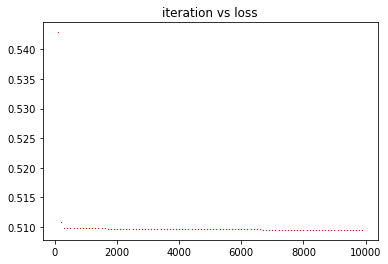

Weights1 : (5, 11),bais1: (5, 1) , we2: (3, 5), bais2: (3, 1)

Accuracy 82.1
Time Taken to execute main this SVR in seconds 86274


In [127]:
neuron.main(dataframe,test_data)

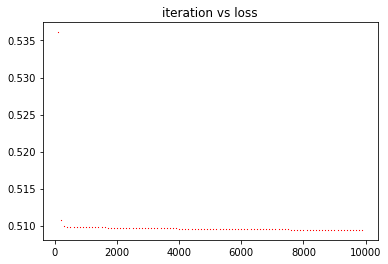

In [128]:
weights1,bais1,weights2,bais2,weights3,bais3=neuron.train(dataframe)

In [129]:
neuron.test(test_data,weights1,bais1,weights2,bais2,weights3,bais3)


Accuracy 82.1


In [130]:
out_stop = datetime.now()
print("Time Taken to solve this SVR in seconds",(out_start-out_stop).seconds)

Time Taken to solve this SVR in seconds 86143
